In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# data cleaning
df = df.drop('User ID',axis=1)

In [ ]:
# encoding
le = LabelEncoder()
gender_le = le.fit_transform(df['Gender'])
df.Gender = gender_le

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[:,:3].values
y = df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')  # max_depth = log(ft)/log(2),  max_features = sqrt of features
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

**Predicting the Test set results**

In [ ]:
y_pred = rf.predict(X_test_scaled)

**Making the Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[39  9]
 [ 2 30]]


* correctly predicted = 69/80

In [ ]:
print("classification report:")
print(classification_report(y_test,y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        48
           1       0.77      0.94      0.85        32

    accuracy                           0.86        80
   macro avg       0.86      0.88      0.86        80
weighted avg       0.88      0.86      0.86        80



accuracy : 0.86 shows that the model is a good one

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'Gender <= 0.0\ngini = 0.451\nsamples = 202\nvalue = [210, 110]\nclass = P'),
 Text(0.25, 0.5, 'EstimatedSalary <= 0.627\ngini = 0.473\nsamples = 108\nvalue = [106, 66]\nclass = P'),
 Text(0.125, 0.16666666666666666, 'gini = 0.359\nsamples = 78\nvalue = [101, 31]\nclass = P'),
 Text(0.375, 0.16666666666666666, 'gini = 0.219\nsamples = 30\nvalue = [5, 35]\nclass = u'),
 Text(0.75, 0.5, 'EstimatedSalary <= 0.656\ngini = 0.418\nsamples = 94\nvalue = [104, 44]\nclass = P'),
 Text(0.625, 0.16666666666666666, 'gini = 0.298\nsamples = 80\nvalue = [103, 23]\nclass = P'),
 Text(0.875, 0.16666666666666666, 'gini = 0.087\nsamples = 14\nvalue = [1, 21]\nclass = u')]

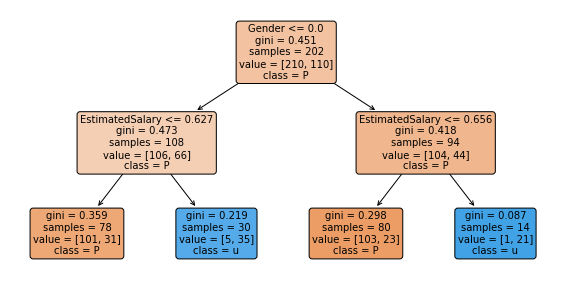

In [ ]:
from sklearn.tree import plot_tree

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt') 
rf.fit(X_train_scaled,y_train)

fig = plt.figure(figsize=(10, 5))
plot_tree(rf.estimators_[1],
          feature_names= df.columns[[0,1,2]],   # features
          class_names=df.columns[3],          # target
          filled=True, impurity=True, rounded=True)

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'Age <= 0.513\ngini = 0.499\nsamples = 52\nvalue = [42, 38]\nclass = P'),
 Text(0.25, 0.5, 'Age <= -0.169\ngini = 0.273\nsamples = 28\nvalue = [36, 7]\nclass = P'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 14\nvalue = [21, 0]\nclass = P'),
 Text(0.375, 0.16666666666666666, 'gini = 0.434\nsamples = 14\nvalue = [15, 7]\nclass = P'),
 Text(0.75, 0.5, 'EstimatedSalary <= 0.716\ngini = 0.272\nsamples = 24\nvalue = [6, 31]\nclass = u'),
 Text(0.625, 0.16666666666666666, 'gini = 0.105\nsamples = 13\nvalue = [1, 17]\nclass = u'),
 Text(0.875, 0.16666666666666666, 'gini = 0.388\nsamples = 11\nvalue = [5, 14]\nclass = u')]

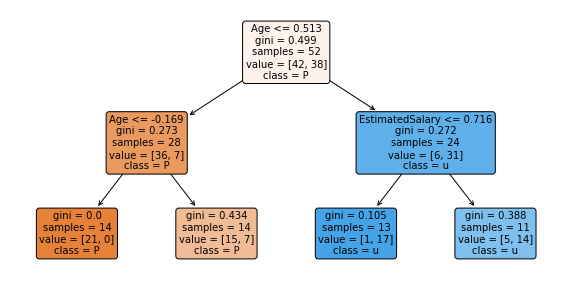

In [ ]:
from sklearn.tree import plot_tree

rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt') 
rf.fit(X_test_scaled,y_test)

fig = plt.figure(figsize=(10, 5))
plot_tree(rf.estimators_[1],
          feature_names= df.columns[[0,1,2]],   # features
          class_names=df.columns[3],          # target
          filled=True, impurity=True, rounded=True)